In [1]:
import keras
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder,Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import  matplotlib.pyplot as plt
# import os
# os.environ["PATH"] += os.pathsep + "D:\\Program Files (x86)\\Graphviz2.38\\bin\\"
# print(os.environ["PATH"])
import pydotplus

Using TensorFlow backend.


In [2]:
data = pd.read_csv('./modeldata1.csv',encoding="gbk")
data['target'] = data['是否逾期'].map({
    "是":1,
    "否":0
})
data = data.drop(['是否逾期'],axis=1)
data.head()

,申请时段,grade,closed_accounts,open_accounts,enquiry_alert,人脸相似度,电话使用时长,年龄,分区,信用卡额度使用率,...,历史近两年逾期最大天数,ULC33S,近三个月逾期天数,G207O,dsr_before,身份证号首字母,历史申请贷款查询数,开户成功率,total_monthly_obligation,target
0,21点,HH,14,5,57,0.34,Missing,35,元朗,0.98,...,18,220605,18,12357,73,Z,20,0.75,12702,0
1,22点,HH,1,5,63,0.55,两年以上,33,葵青,1.01,...,0,274346,0,8910,45,Z,6,0.17,9255,0
2,13点,II,29,6,71,0.54,两年以上,46,九龙城,0.65,...,0,309839,0,19507,82,G,30,1.10,19692,0
3,11点,II,20,4,58,0.56,两年以上,27,屯门,0.00,...,8,40806,8,2267,8,Y,27,0.63,2451,0
4,10点,HH,2,5,45,0.50,两年以上,28,屯门,0.98,...,0,240985,0,10775,22,Y,4,1.25,11120,0


In [3]:
import numbers
allFeatures = list(data.columns)
allFeatures.remove('target')

numerical_var = []
for col in allFeatures:
    if len(set(data[col])) == 1:
        print('delete {} from the dataset because it is a constant'.format(col))
        del data[col]
        allFeatures.remove(col)
    else:
        uniq_valid_vals = [i for i in data[col] if i == i]
        uniq_valid_vals = list(set(uniq_valid_vals))
        if len(uniq_valid_vals) >= 6 and isinstance(uniq_valid_vals[0], numbers.Real):
            numerical_var.append(col)

categorical_var = [i for i in allFeatures if i not in numerical_var]
print(numerical_var)
print(categorical_var)

['closed_accounts', 'open_accounts', 'enquiry_alert', '人脸相似度', '年龄', '信用卡额度使用率', '信用卡数', '信用卡平均额度', '贷款数', '贷款平均额度', '平均分期金额', '平均期数', '90天内贷款查询次数', '180天内贷款查询次数', '120天内信用卡查询次数', '365天内信用卡查询次数', '历史近两年逾期最大天数', 'ULC33S', '近三个月逾期天数', 'G207O', 'dsr_before', '历史申请贷款查询数', '开户成功率', 'total_monthly_obligation']
['申请时段', 'grade', '电话使用时长', '分区', '身份证号首字母']


In [4]:
def preprocessing():
    
    #label = data['target']
    #data = data.drop(['target'],axis=1)
    #特征选择
    #考虑相关性，可以去除几个属性，但因为总体的属性不多，暂不处理
    #特征处理
    for i in range(len(numerical_var)):
        data[numerical_var[i]] = MinMaxScaler().fit_transform(data[numerical_var[i]].values.reshape(-1,1)).reshape(1,-1)[0]

    #处理离散值数值化
    for i in range(len(categorical_var)):
        if categorical_var[i] == "申请时段":
            data[categorical_var[i]] = [map_apply(s) for s in data["申请时段"].values]
            data[categorical_var[i]] = MinMaxScaler().fit_transform(data[categorical_var[i]].values.reshape(-1,1)).reshape(1,-1)[0]
        elif categorical_var[i] == "grade":
            data[categorical_var[i]] = [map_grade(w) for w in data['grade'].values]
            data[categorical_var[i]] = MinMaxScaler().fit_transform(data[categorical_var[i]].values.reshape(-1,1)).reshape(1,-1)[0]
        else:
            data[categorical_var[i]] = LabelEncoder().fit_transform(data[categorical_var[i]])
            #对于labelEncoder的情况下还需要进行归一化处理
            data[categorical_var[i]] = MinMaxScaler().fit_transform(data[categorical_var[i]].values.reshape(-1,1)).reshape(1,-1)[0]

    return data

def map_apply(s):
    d = dict([("0点",24),("1点",1),("2点",2),("3点",3),("4点",4),("5点",5),("6点",6),("7点",7),("8点",8),("9点",9),("10点",10),("11点",11),
             ("12点",12),("13点",13),("14点",14),("15点",15),("16点",16),("17点",17),("18点",18),("19点",19),("20点",20),("21点",21),
             ("22点",22),("23点",23)])
    return d.get(s,0)
def map_grade(w):
    d = dict([("AA",9),("BB",8),("CC",7),("DD",6),("EE",5),("FF",4),("GG",3),("HH",2),("II",1)])
    return d.get(w,0)

/Users/roy/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


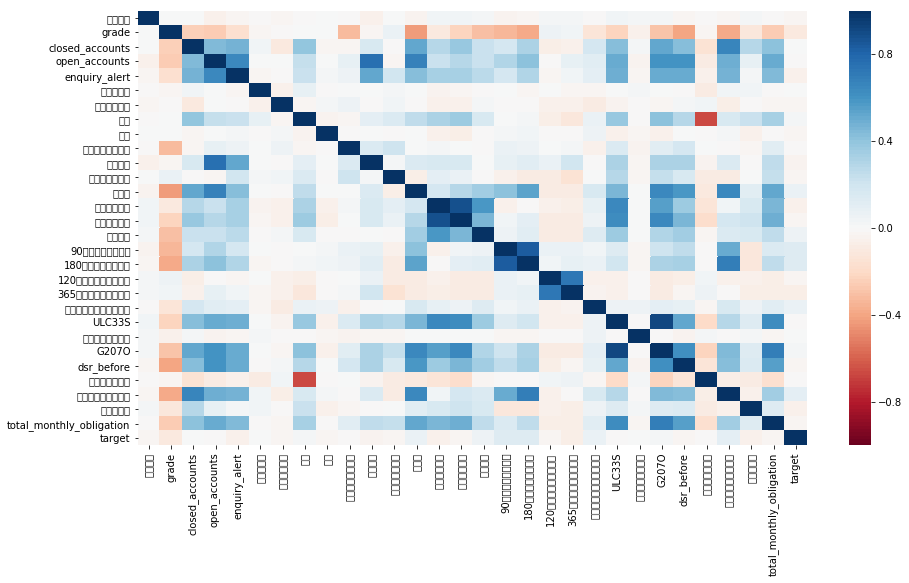

          申请时段  grade  closed_accounts  open_accounts  enquiry_alert  \
0     0.869565  0.125         0.325581       0.294118       0.248908   
1     0.913043  0.125         0.023256       0.294118       0.275109   
2     0.521739  0.000         0.674419       0.352941       0.310044   
3     0.434783  0.000         0.465116       0.235294       0.253275   
4     0.391304  0.125         0.046512       0.294118       0.196507   
5     0.434783  0.000         0.302326       0.705882       0.327511   
6     0.521739  0.000         0.162791       0.352941       0.401747   
7     0.565217  0.375         0.046512       0.000000       0.096070   
8     0.869565  0.125         0.255814       0.411765       0.419214   
9     1.000000  0.000         0.116279       0.235294       0.266376   
10    0.434783  0.000         0.069767       0.352941       0.327511   
11    0.565217  0.000         0.162791       0.470588       0.358079   
12    0.608696  0.000         0.069767       0.411765       0.20

In [5]:
import seaborn as sns
%matplotlib inline

X = preprocessing()
plt.figure(figsize=(15, 8))
sns.heatmap(X.corr(),vmin=-1,vmax=1,cmap=sns.color_palette("RdBu",n_colors=128))
plt.show()
Y = X['target']
X = X.drop(['target'],axis=1)
print(X)
print(Y)

In [6]:
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

# sample_solver = SMOTE(random_state=0)
# X_train ,Y_train = sample_solver.fit_sample(X_train,Y_train)
# X_test,Y_test = sample_solver.fit_sample(X_test,Y_test)
print(X_train.shape)
print(X_test.shape)


(1094, 29)
(469, 29)


In [7]:
def doMetrics(Y_true,Y_predict,clf_name):
    from sklearn.metrics import accuracy_score,recall_score,f1_score,confusion_matrix
    print(clf_name,"_Acc:",accuracy_score(Y_true,Y_predict))
    print(clf_name,"_recall:",recall_score(Y_true,Y_predict))
    print(clf_name,"_f1-score:",f1_score(Y_true,Y_predict))
    print(confusion_matrix(Y_true,Y_predict,labels=[0,1]))

In [8]:
def plot(history, epochs):
    # 绘图
    history_dict = history.history
    epochs = range(1, epochs+1)

    flg = plt.figure()
    plt.subplot(2, 1, 1)
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    plt.plot(epochs, loss_values, 'b', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 1, 2)
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    plt.plot(epochs, acc_values, 'b', label='Training acc')
    plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    flg.tight_layout()
    plt.show()

469/469 [==============================] - 0s 106us/step
Test score: 0.363745012072
Test accuracy: 0.893390192152


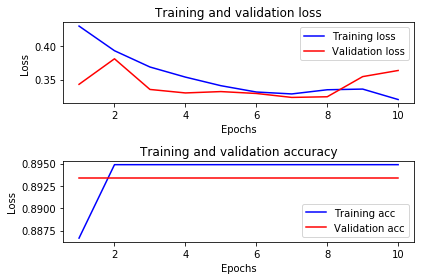

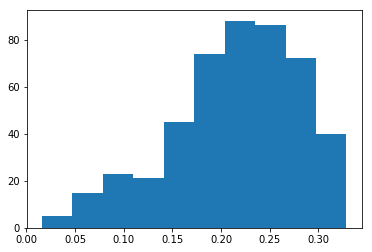

/Users/roy/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


best_threhold: 0.27485
best_f1_score: 0.293706293706
nn _Acc: 0.784648187633
nn _recall: 0.42
nn _f1-score: 0.293706293706
[[347  72]
 [ 29  21]]


In [12]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
batch_size = 32 
epochs = 10
model = Sequential()
model.add(Dense(256, input_shape=(29,)))
model.add(Activation('relu'))
# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(Dense(64))
# model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics=['accuracy','crossentropy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=0, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])
plot(history,epochs)

#寻找最优阈值
from sklearn.metrics import f1_score
predict = model.predict(X_test)
plt.hist(predict)
plt.show()
best_threhold = 0
best_f1_score = 0
for threhold in np.arange(0.00001,1,0.00001):
    predict_y = (predict > threhold)
    curr_f1_socre = f1_score(Y_test,predict_y)
    if curr_f1_socre > best_f1_score:
        best_threhold = threhold
        best_f1_score = curr_f1_socre
print("best_threhold:",best_threhold)
print("best_f1_score:",best_f1_score)
doMetrics(Y_test,(predict > best_threhold),'nn')

In [131]:
doMetrics(Y_test,(predict > 0.2),'cnn')

cnn _Acc: 0.665871121718
cnn _recall: 0.692124105012
cnn _f1-score: 0.674418604651
[[268 151]
 [129 290]]
